# NEURAL NETWORKS - COMP258
## MIDTERM EXAM - EXERCISE 2
## Nestor Romero - 301133331

In [2]:
# Initial library import
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

# Sklearn imports for preprocessing and balan
from sklearn import preprocessing
from sklearn.utils import resample

from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
######## 1. LOAD DATASET FILE INTO DATA FRAME

diabetes_df = pd.read_csv('diabetes_noheaders.csv',
                          names=['pregnancies','glucose','blood_pressure','skin_thickness', 
                                 'insulin', 'bmi', 'pedigree_fn', 'age', 'class'])
print('GENERAL DATASET INFORMATION\n', diabetes_df.describe(),'\n')
print('DATA SAMPLE\n', diabetes_df.head(), '\n')
print('CLASS VALUE COUNTS\n', diabetes_df['class'].value_counts(), '\n')

########################################
# >> Balance classes with upsampling  >> Makes the problem worst
# print('>> BALANCING CLASSES')
# diabetes_majority = diabetes_df[diabetes_df['class']==0]
# diabetes_minority = diabetes_df[diabetes_df['class']==1]

# # Upsample minority class (1)
# df_minority_upsampled = resample(diabetes_minority, 
#                                  replace=True,                # sample with replacement - upsample
#                                  n_samples=diabetes_majority.shape[0],    # to match majority class
#                                  random_state=301133331)      
 
# # Combine majority class with upsampled minority class
# # diabetes_df = pd.concat([diabetes_majority, df_minority_upsampled])
 
# # Display new class counts
# print(diabetes_df['class'].value_counts())

########################################
# Create inputs and outputs
X_init = diabetes_df.iloc[:,0:8].to_numpy() #Input values (n,8)
y = diabetes_df['class'].to_numpy()   #Output values (n)

print(type(X_init))
print(type(y))

print(f'Inputs shape: {X_init.shape}')
print(f'Outputs shape: {y.shape}')
# print(X_init[0].shape)
# print(X_init[0])

########################################
# >> Scale values
# scaler = preprocessing.StandardScaler() # Stddist values
scaler = preprocessing.MinMaxScaler() # Values in range 0-1
X = scaler.fit_transform(X_init)

print()
print('DATA SAMPLE BEFORE & AFTER PREPROCESSING')
print(X_init[:2],'\n', X[:2])

########################################
# Create training and test datasets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=301133331)

GENERAL DATASET INFORMATION
        pregnancies     glucose  blood_pressure  skin_thickness     insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              bmi  pedigree_fn         age       class  
count  768.000000   768.000000  768.000000  768.000000  
mean    31.992578     0.471876   33.240885    0.348958  
std      7.884160     0.331329   11.760232    0.476951  
min      0.000000     0.078000   21.0000

In [6]:
######## 2. DESIGN MLP NET - SEQUENTIAL API

model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation="relu", input_shape=(8,)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))


In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
######## 3. COMPILE MODEL WITH BINARY CROSS ENTROPY FOR LOSS
# optimizer = keras.optimizers.Adam(learning_rate=0.01) # default 0.001

# model.compile(loss="binary_crossentropy", 
#               optimizer="sgd",
#               metrics=["accuracy"])

np.random.seed(42)
tf.random.set_seed(42)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])


In [9]:
# weight examination
# hidden_layer1 = model.layers[1]
# weights_hl1, biases_hl1 = hidden_layer1.get_weights()
# print(weights_hl1.shape)
# print(weights_hl1[0])
# print(biases_hl1)
# print(biases_hl1.shape)

print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

[[0.47058824 0.52763819 0.81967213 ... 0.64530551 0.06874466 0.4       ]
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.         0.89949749 0.73770492 ... 0.65722802 0.25960717 0.03333333]
 ...
 [0.11764706 0.77889447 0.42622951 ... 0.57675112 0.06917165 0.06666667]
 [0.         0.47738693 0.52459016 ... 0.66467958 0.12297182 0.01666667]
 [0.05882353 0.94974874 0.49180328 ... 0.4485842  0.13663535 0.63333333]]


In [10]:
######## 4. FIT DATA INTO THE MODEL
results = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
20/20 [==============================] - 0s 15ms/step - loss: 0.6660 - accuracy: 0.6498 - val_loss: 0.6571 - val_accuracy: 0.6558
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6498 - val_loss: 0.6513 - val_accuracy: 0.6558
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6498 - val_loss: 0.6469 - val_accuracy: 0.6558
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6498 - val_loss: 0.6430 - val_accuracy: 0.6558
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.6498 - val_loss: 0.6386 - val_accuracy: 0.6558
Epoch 6/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6498 - val_loss: 0.6326 - val_accuracy: 0.6558
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.6515 - val_loss: 0.6289 - val_accuracy: 0.6883
Epoch 8/30
20/20 [=

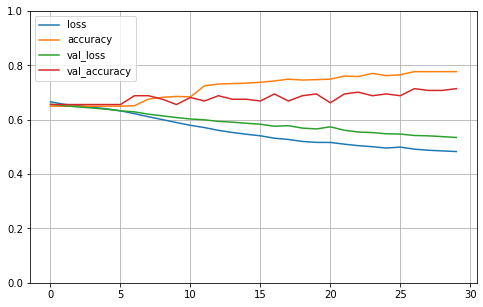

In [11]:
######## 4b. PLOT MODEL PERFORMANCE WITH TEST AND VALIDATION DATA
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(results.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [12]:
######## 5. EVALUATE MODEL
model.evaluate(X_test, y_test)


5/5 [==============================] - 0s 800us/step - loss: 0.5347 - accuracy: 0.7143


[0.5346691608428955, 0.7142857313156128]

In [13]:
######## 6. TEST MODEL PREDICTION WITH DATA SAMPLE
sample_size = 10
X_sample = X_test[:sample_size]
# print(model.predict(X_sample))
y_predicted = (model.predict(X_sample) > 0.5).astype("int32")

for i in range(0, sample_size):
    print(f'x = {X_test[i]},\ny = {y_test[i]},\tpredicted_value = {y_predicted[i]}\n')
    

x = [0.47058824 0.88442211 0.73770492 0.34343434 0.35460993 0.50223547
 0.16609735 0.61666667],
y = 1,	predicted_value = [1]

x = [0.47058824 0.56281407 0.59016393 0.         0.         0.35171386
 0.32536294 0.61666667],
y = 0,	predicted_value = [0]

x = [0.58823529 0.80904523 0.55737705 0.23232323 0.15602837 0.38002981
 0.1058924  0.43333333],
y = 1,	predicted_value = [1]

x = [0.41176471 0.79899497 0.52459016 0.         0.         0.40834575
 0.09222886 0.31666667],
y = 0,	predicted_value = [1]

x = [0.17647059 0.51256281 0.36065574 0.2020202  0.11111111 0.45901639
 0.13748933 0.08333333],
y = 0,	predicted_value = [0]

x = [0.64705882 0.69346734 0.62295082 0.         0.         0.4947839
 0.14602904 0.23333333],
y = 0,	predicted_value = [1]

x = [0.         0.5879397  0.6557377  0.31313131 0.06264775 0.67362146
 0.00469684 0.05      ],
y = 0,	predicted_value = [0]

x = [0.70588235 0.70351759 0.67213115 0.43434343 0.38416076 0.58420268
 0.19214347 0.61666667],
y = 1,	predicted_value 

In [14]:
######## 7. CHANGES TO THE MODEL
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(8,)))
model2.add(keras.layers.Dense(16, activation="relu"))
model2.add(keras.layers.Dense(16, activation="relu"))
model2.add(keras.layers.Dense(16, activation="relu"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

optimizer2 = keras.optimizers.Adam(learning_rate=0.01) # default 0.001
model2.compile(loss="binary_crossentropy", optimizer=optimizer2, metrics=["accuracy"])
model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
model2.evaluate(X_test, y_test)

Epoch 1/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.6450 - val_loss: 0.6417 - val_accuracy: 0.6494
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.6759 - val_loss: 0.6108 - val_accuracy: 0.6558
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7231 - val_loss: 0.6314 - val_accuracy: 0.6558
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7280 - val_loss: 0.5769 - val_accuracy: 0.6818
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7427 - val_loss: 0.5777 - val_accuracy: 0.6688
Epoch 6/30
20/20 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7492 - val_loss: 0.5407 - val_accuracy: 0.7013
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.7573 - val_loss: 0.5216 - val_accuracy: 0.7273
Epoch 8/30
20/20 [==

[0.5020424127578735, 0.7597402334213257]

Despite considerable changes in the model configuration, the accuracy didn't improve dramaticaly in my case. I could not detect if my environment is causing problems with Keras.

I couldn't detect the reason why the loss function kept being reported as nan for all the different tests and configurations I did.